# 의류 이미지 인식(2/3) - 모델 학습

## 사용할 라이브러리 불러오기

In [1]:
import sys, os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

## 초기 설정

In [2]:
# root_dir = "./fashion/"
# categories = ["long_dress", "mini_dress", "long_skirt", "mini_skirt", "long_pants", "short", "long_sleeve", "short_sleeve", "sleeveless", "short_shirt", "long_shirt"]
root_dir = "./fashion2/"
categories = ['long blouse_check','long blouse_none','long blouse_pattern','long dress_long sleeves',
              'long dress_short sleeves','long pants_jean','long pants_no jean','long shirt_check',
              'long shirt_none','long shirt_pattern','long skirt_A','long skirt_asymmetric',
              'long skirt_H','long sleeve_none','long sleeve_print','long sleeve_stripe',
              'mini dress_longs leeves','mini dress_short sleeves','short blouse_check','short blouse_none',
              'short blouse_pattern','short pants_jean','short pants_no jean','short shirt_check',
              'short shirt_none','short shirt_pattern','short skirt_A','short skirt_asymmetric',
              'short skirt_H','short sleeve_none','short sleeve_print','short sleeve_stripe',
              'sleeveless_none','sleeveless_print','sleeveless_stripe']
nb_classes = len(categories)
image_size = 64

In [3]:
# x_train, x_test, y_train, y_test = np.load("./fashion/fashion.npy", allow_pickle=True)
x_train, x_test, y_train, y_test = np.load("./fashion2/fashion.npy", allow_pickle=True)
x_train = x_train.astype("float") / 256
x_test = x_test.astype("float") / 256
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(29516, 64, 64, 3)
(29516, 35)
(9839, 64, 64, 3)
(9839, 35)


In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(64,64,3),kernel_size=(3,3), filters=64, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=64, padding='same')  )
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=128, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=128, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='valid'))
model.add(BatchNormalization())
model.add(Activation("relu"))

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(rate=0.5))
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(units=512, activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(nb_classes, activation="softmax"))

model.compile(loss='binary_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy'])

In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(64,64,3),kernel_size=(3,3), filters=64, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=64, padding='same')  )
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=128, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=128, padding='same'))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='valid'))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())

model.add(Dense(units=512, activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(units=256, activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(nb_classes, activation="softmax"))

model.compile(loss='binary_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy'])

In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(64,64,3),kernel_size=(3,3), filters=64, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=64, padding='same')  )
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=128, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=128, padding='same'))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same'))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding='same'))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(units=512, activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(nb_classes, activation="softmax"))

model.compile(loss='binary_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy'])

In [12]:
model = Sequential()
model.add(Conv2D(input_shape=(64,64,3),kernel_size=(3,3), filters=64, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=64, padding='same')  )
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=128, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=128, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same'))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding='same'))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding='same'))
model.add(Activation("relu"))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding='same'))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(units=512, activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(nb_classes, activation="softmax"))

model.compile(loss='binary_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy'])

In [62]:
def layer(x):
    x_1 = Conv2D(filters=64, kernel_size=(3,3), padding="same")(x)    
    x_2 = BatchNormalization()(x_1)    
    x_3 = Activation("relu")(x_2)    
    x_4 = Conv2D(filters=64, kernel_size=(3,3), padding="same")(x_3)    
    x_5 = BatchNormalization()(x_4)    
    output = Concatenate()([x,x_5])
    
    return output

def makeModel(x):
    x_1 = Conv2D(filters=64, kernel_size=(9,9), padding="same")(x)
    x_2 = Activation("relu")(x_1)
    
    x_res = x_2
    for i in range(3):
        x_res = layer(x_res)
        
    x_3 = Conv2D(filters=64, kernel_size=(3,3), padding="valid")(x_res)    
    x_4 = BatchNormalization()(x_3)    
    x_5 = Conv2D(filters=64, kernel_size=(3,3), padding="valid")(x_4)    
    x_6 = Activation("relu")(x_5)    
    x_7 = Conv2D(filters=64, kernel_size=(3,3), padding="valid")(x_6)    
    x_8 = Activation("relu")(x_7)    
    x_9 = Conv2D(filters=64, kernel_size=(9,9), padding="valid")(x_8)    
    x_10 = Flatten()(x_9)
    
#     x_11 = Dense(units=256, activation="relu")(x_10)    
#     x_12 = Dropout(rate=0.5)(x_11)
    
#     x_13 = Dense(units=512, activation="softmax")(x_12)    
#     x_14 = Dropout(rate=0.5)(x_13)
    
    x_result= Dense(nb_classes, activation="softmax")(x_10)

    return x_result

In [63]:
input_layer = Input(shape=(64,64,3))
x = makeModel(input_layer)
model = Model(inputs=input_layer, outputs=x)

In [64]:
model.compile(
   loss='binary_crossentropy', 
    optimizer='rmsprop', 
    metrics=['accuracy']
)

In [65]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_115 (Conv2D)             (None, 64, 64, 64)   15616       input_9[0][0]                    
__________________________________________________________________________________________________
activation_68 (Activation)      (None, 64, 64, 64)   0           conv2d_115[0][0]                 
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 64, 64, 64)   36928       activation_68[0][0]              
____________________________________________________________________________________________

In [66]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
save_path = "./fashion2/fashion_best_model.h5"
callbacks=[
    ReduceLROnPlateau(monitor="val_accuracy",
                      patience = 3,
                      factor = 0.2,
                      verbose=2,
                      min_ir=1e-5),
    ModelCheckpoint(filepath = save_path,
                    monitor = "val_accuracy",
                    verbose=1,
                    save_best_only=True),
    EarlyStopping(monitor="val_accuracy", 
                  patience=5, 
                  verbose=1)
]

In [67]:
history = model.fit(x_train, y_train, batch_size=64, epochs=35, callbacks=callbacks, validation_split=0.20)

Train on 23612 samples, validate on 5904 samples
Epoch 1/35
23552/23612 [============================>.] - ETA: 0s - loss: 0.8753 - accuracy: 0.9429
Epoch 00001: val_accuracy improved from -inf to 0.94286, saving model to ./fashion2/fashion_best_model.h5
23612/23612 [==============================] - 225s 10ms/sample - loss: 0.8753 - accuracy: 0.9429 - val_loss: 0.8788 - val_accuracy: 0.9429
Epoch 2/35
23552/23612 [============================>.] - ETA: 0s - loss: 0.8788 - accuracy: 0.9429
Epoch 00002: val_accuracy did not improve from 0.94286
23612/23612 [==============================] - 218s 9ms/sample - loss: 0.8788 - accuracy: 0.9429 - val_loss: 0.8788 - val_accuracy: 0.9429
Epoch 3/35
23552/23612 [============================>.] - ETA: 0s - loss: 0.8788 - accuracy: 0.9429
Epoch 00003: val_accuracy did not improve from 0.94286
23612/23612 [==============================] - 218s 9ms/sample - loss: 0.8788 - accuracy: 0.9429 - val_loss: 0.8788 - val_accuracy: 0.9429
Epoch 4/35
23552/

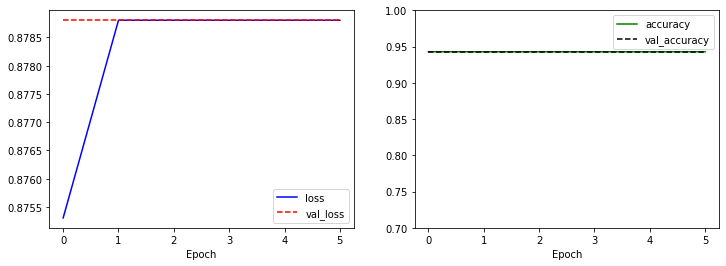

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [10]:
model.evaluate(x_test, y_test)

9839/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.03501272868561556, 0.9881112]

In [60]:
model.save("./fashion/fashion_model.h5")

In [8]:
from tensorflow.keras.models import load_model
from sklearn.ensemble import VotingClassifier

model_1 = load_model('./fashion/새 폴더/fashion_best_model_0.9966.h5')
model_2 = load_model('./fashion/새 폴더/fashion_best_model_0.9981.h5')
model_3 = load_model('./fashion/새 폴더/fashion_best_model_0.9987.h5')

vo_clf = VotingClassifier(estimators=[("best1",model_1),
                                      ("best2",model_2),
                                      ("best3",model_3)], 
                          voting="soft"
                         )

vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))


NotImplementedError: Multilabel and multi-output classification is not supported.